# This notebook is used to process my dataset used for my research.

## Machine generated news

### Function to process jsonl file and read in lines filtering out just the machine generated articles with filer keys (article and label)

In [1]:
custom_seed=1701

In [2]:
import json
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

def process_file(file_path, unique_lines):
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            record = json.loads(line)

            if record.get('label') == 'human':
                continue

            filtered_record = {}
            filter_keys = ['article', 'label']
            for key in filter_keys:
                if key in record:
                    filtered_record[key] = record[key]
            
            # filtered_record = {key: record[key] for key in ['article', 'label'] if key in record}
            unique_lines.add(json.dumps(filtered_record, ensure_ascii=False))

### Look at one of the files to see what the data looks like in the grover generated news file

In [10]:
# file_path = "./data/generator=base~dataset=p0.90.jsonl"
# file_path = "./data/generator=medium~dataset=p0.90.jsonl"
file_path = "./data/generator=mega~dataset=p0.90.jsonl"

records = []


with open(file_path, 'r', encoding='utf-8') as file:
    for line in tqdm(file):
        record = json.loads(line)
        records.append(record)

df = pd.DataFrame(records)

print(df.head())
print(f"Total records in DataFrame: {len(df)}")

label_counts = df['label'].value_counts()
print(label_counts)

0it [00:00, ?it/s]

                                             article               domain  \
0  Patrons crowd the platform at the Washington M...    theepochtimes.com   
1  As the price of oil continues to rise due to i...     seekingalpha.com   
2  In December 2018 the issue of why the Canadian...    ottawacitizen.com   
3  Modi also said the opposition wants to strip t...  deccanchronicle.com   
4  Following a community meeting held yesterday a...  jamaica-gleaner.com   

                                               title            date  \
0  US Senators Threaten Metro Funding Over Chines...  April 15, 2019   
1   Supply Fundamentals Point To Continued Oil Rally  April 12, 2019   
2  Military assessment ruling out the need for a ...  April 16, 2019   
3  Mahamilavat gang scared I will shut their shop...  April 11, 2019   
4  Residents lament waterfront noise nuisance - K...  April 10, 2019   

                      authors  ind30k  \
0                        None   29363   
1               Atlas 

### Process all the jsonl files and merge into one dataset

In [3]:
unique_lines = set()

file_paths = [
    './data/generator=base~dataset=p0.90.jsonl',
    './data/generator=base~dataset=p0.92.jsonl',
    './data/generator=base~dataset=p0.94.jsonl',
    './data/generator=base~dataset=p0.96.jsonl',
    './data/generator=base~dataset=p0.98.jsonl',
    './data/generator=base~dataset=p1.00.jsonl',
    './data/generator=medium~dataset=p0.90.jsonl',
    './data/generator=medium~dataset=p0.92.jsonl',
    './data/generator=medium~dataset=p0.94.jsonl',
    './data/generator=medium~dataset=p0.96.jsonl',
    './data/generator=medium~dataset=p0.98.jsonl',
    './data/generator=medium~dataset=p1.00.jsonl',
    './data/generator=mega~dataset=p0.90.jsonl',
    './data/generator=mega~dataset=p0.92.jsonl',
    './data/generator=mega~dataset=p0.94.jsonl',
    './data/generator=mega~dataset=p0.96.jsonl',
    './data/generator=mega~dataset=p0.98.jsonl',
    './data/generator=mega~dataset=p1.00.jsonl'
]

unique_lines = set()

for file_path in tqdm(file_paths):
    process_file(file_path, unique_lines)

  0%|          | 0/18 [00:00<?, ?it/s]

### Create a machine dataframe with all the machine generated data

In [4]:
import subprocess
import time
start_time = time.time()

machine_news_df = pd.DataFrame([json.loads(line) for line in unique_lines])
print(f"DataFrame head and number of records before saving to .npy."+"\n")
print(machine_news_df.head(10))
num_records = len(machine_news_df)
print("\n"+f"Number of records: {num_records}")

end_time = time.time()
duration = end_time - start_time
print("\n"+f"Time taken to process: {duration:.2f} seconds")

DataFrame head and number of records before saving to .npy.

                                             article    label
0  This weekend, Sen. Bernie Sanders is scheduled...  machine
1  January 26 is Easter, and it's also a time to ...  machine
2  A COWARD at Stair Hole cove in Poole has been ...  machine
3  Start with a neutral silk suit and breathe dee...  machine
4  BC-EU--UK-Brexit-Wales,1st Ld-Writethru\nLONDO...  machine
5  The New York Yankees continued a five-game los...  machine
6  Please enable Javascript to watch this video\n...  machine
7  Brace yourselves - this Alabama locker room is...  machine
8  Buckle up, because on Thursday, four more fami...  machine
9  Planned for 10 acres off Jonathan Bethel Road ...  machine

Number of records: 179998

Time taken to process: 1.28 seconds


## Human created real news

In [12]:
import pandas as pd

# Define the path to the file
file_path = 'data/realnews.jsonl'

# Read only the first 5 lines from the JSON Lines file
df = pd.read_json(file_path, lines=True, nrows=5)

# Display the data
print(df)

                                                 url  \
0  http://mashable.com/2016/09/21/dairy-queen-sna...   
1  http://www.washingtonpost.com/blogs/on-faith/w...   
2  http://www.nydailynews.com/life-style/driver-k...   
3  http://www.nydailynews.com/sports/football/gia...   
4  https://www.thesun.co.uk/news/1430259/little-l...   

                                            url_used  \
0  https://web.archive.org/web/2016092119id_/http...   
1  https://web.archive.org/web/2013121219id_/http...   
2  https://web.archive.org/web/2015072219id_/http...   
3  https://web.archive.org/web/2015100519id_/http...   
4  https://web.archive.org/web/2016071219id_/http...   

                                               title  \
0  Here's what happened when we blew NYC's mind w...   
1  In Pope Francis era, Catholics still finding t...   
2  Aussie who killed 2 in crashes wants driver's ...   
3  Myers: Jets, Giants both relevant at quarter mark   
4  Little lad, two, has to be rescued by firef

### Find the total number of records in the file

In [5]:
import subprocess
import time

human_news_file = './data/realnews.jsonl'
start_time = time.time()

# First way to read files for a record count (17 seconds)
# total_records = 0
# with open(input_file_path, 'r', encoding='utf-8') as file:
#     for line in tqdm(file):
#         total_records += 1

# Second way to read files for a record count (16 seconds)
# total_records = sum(1 for _ in open(input_file_path, 'r', encoding='utf-8'))

# Third way to read files for a record count (4 seconds)
result = subprocess.run(['wc', '-l', human_news_file], text=True, capture_output=True)
total_records = int(result.stdout.split()[0])

end_time = time.time()
duration = end_time - start_time
total_records = int(result.stdout.split()[0])
print(f"Total records: {total_records}")
print("\n"+f"Time taken to process: {duration:.2f} seconds")

Total records: 10030998

Time taken to process: 3.99 seconds


### Randomly select human news articles

In [6]:
desired_records = 300000
selection_probability = desired_records / total_records

selected_records = []
with open(human_news_file, 'r', encoding='utf-8') as input_file:
    for line in tqdm(input_file, total=total_records):
        if random.random() < selection_probability:
            record = json.loads(line)

            filtered_record = {
                'article': record.get('text', ''),
                'label': 'human'
            }
            
            selected_records.append(filtered_record)

human_news_df = pd.DataFrame(selected_records)

print(human_news_df.head(10))
print("\n"+f"Total records selected: {len(human_news_df)}")

  0%|          | 0/10030998 [00:00<?, ?it/s]

                                             article  label
0  Locals call Radishchev Street the "street of t...  human
1  Limeade has pulled in $5 million in fresh capi...  human
2  A 43-year-old woman who bravely chased down an...  human
3  Let me be clear: I do not believe that Nazi wa...  human
4  This past weekend, much of the Mashable team d...  human
5  James Bond was always fussy about his food – r...  human
6  Last Friday’s post, “Big Data Gets Bigger: Now...  human
7  An undated photo of U.S. Army Sgt. Bowe Bergda...  human
8  Updated below with answer and winner.\nWe’ve g...  human
9  It was the sunburn from hell.\nTwo boys were t...  human

Total records selected: 300151


## Combined news

### Combine machine and human news

In [7]:
combined_news_df = pd.concat([machine_news_df, human_news_df], ignore_index=True)
combined_news_df = combined_news_df.sample(frac=1, random_state=777)

print(combined_news_df.head(20))
print("\n" + "Total number of records:", len(combined_news_df))

                                                  article    label
460762  Nearly all the oxygen and outrage in DC is bei...    human
474314  At long last, Adam Levine and Ben Affleck have...    human
339313  Sister of slain teen says she just wants her b...    human
389473  Humor, compassion, honesty and more things men...    human
336711  By The Life Science Report\nSource: Daniel Car...    human
82126   CLEVELAND, Ohio – Today we’ll be bringing peop...  machine
291641  NU Online News Service, June 19, 3:44 p.m. EDT...    human
20863   In the past few quarters, both passenger vehic...  machine
201018  THE Ford F-150 Raptor and Mustang Shelby GT350...    human
105409  Kyle Singler has other dreams this offseason.\...  machine
70554   LAHORE: Pakistan Muslim League, Tehreek-e-Insa...  machine
136016  × Indiana University to recreate ancient, huge...  machine
312914  (Reuters) - Generic drugmaker Mylan NV (MYL.O)...    human
283240  0\nA new month is almost here, which means Net...    h

### Display distribtuion of machine versus human news

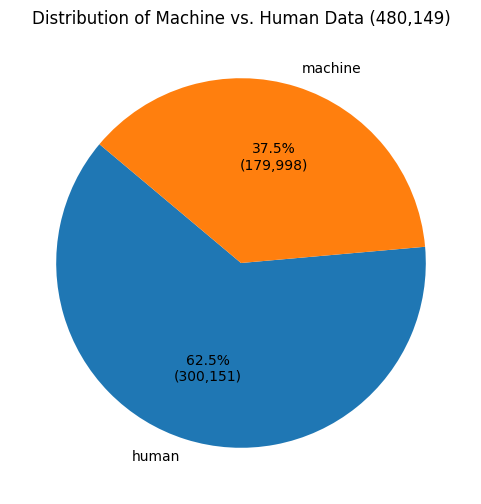

In [8]:
import matplotlib.pyplot as plt
label_counts = combined_news_df ['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index,
        autopct=lambda p: f'{p:.1f}%\n({(p/100)*label_counts.sum():,.0f})', startangle=140)
plt.title(f'Distribution of Machine vs. Human Data ({len(combined_news_df ):,})')
plt.show()

### Write the combined news dataframe to a file

In [9]:
array = combined_news_df.to_numpy()
np.save('./data/combined~large_dataset.npy', array)

num_records = len(combined_news_df)
print("Number of records written:", num_records)

Number of records written: 480149


### Load the combined news file into a dataframe

In [10]:
array = np.load('./data/combined~large_dataset.npy', allow_pickle=True)
news_df = pd.DataFrame(array, columns=['article', 'label'])

num_records = len(news_df)
print(f"Number of records loaded:", num_records)

Number of records loaded: 480149


### Plot and see if the distribution still looks correct

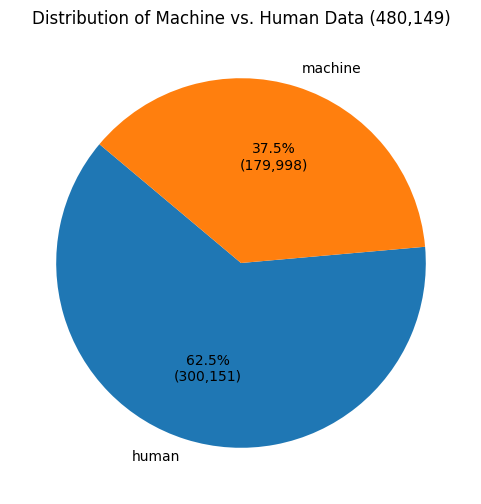

In [11]:
label_counts = news_df['label'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index,
        autopct=lambda p: f'{p:.1f}%\n({(p/100)*label_counts.sum():,.0f})', startangle=140)
plt.title(f'Distribution of Machine vs. Human Data ({len(news_df):,})')
plt.show()

## Prepare data for training

### Replace label with number

In [12]:
news_df = news_df[['article', 'label']]
news_df['label'] = news_df['label'].replace({'human': 0, 'machine': 1})
news_df

/tmp/ipykernel_97710/201239586.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  news_df['label'] = news_df['label'].replace({'human': 0, 'machine': 1})


,article,label
0,Nearly all the oxygen and outrage in DC is bei...,0
1,"At long last, Adam Levine and Ben Affleck have...",0
2,Sister of slain teen says she just wants her b...,0
3,"Humor, compassion, honesty and more things men...",0
4,By The Life Science Report\nSource: Daniel Car...,0
...,...,...
480144,"* Bounce back to 1,000-capacity matroncy will ...",1
480145,Many European and US businesses aren't prepare...,0
480146,According to Flickr statistics regarding camer...,0
480147,1 of 9 2 of 9\nUPDATE: BTS's management agency...,0


### Split dataset into training, evaluation, and test

In [13]:
from datasets import Dataset, DatasetDict
news_ds = DatasetDict({"train": Dataset.from_pandas(news_df)})
news_ds

DatasetDict({
    train: Dataset({
        features: ['article', 'label'],
        num_rows: 480149
    })
})

In [14]:
news_split = news_ds['train'].train_test_split(test_size=0.3, seed=custom_seed)
test_eval_split = news_split['test'].train_test_split(test_size=0.5, seed=custom_seed)
test_eval_split

DatasetDict({
    train: Dataset({
        features: ['article', 'label'],
        num_rows: 72022
    })
    test: Dataset({
        features: ['article', 'label'],
        num_rows: 72023
    })
})

In [15]:
news_split_ds = DatasetDict({
    'train': news_split['train'],  # The training set from the first split
    'eval': test_eval_split['train'],  # Half of the test set from the first split, now used as eval
    'test': test_eval_split['test']  # The other half of the test set from the first split
})
news_split_ds

DatasetDict({
    train: Dataset({
        features: ['article', 'label'],
        num_rows: 336104
    })
    eval: Dataset({
        features: ['article', 'label'],
        num_rows: 72022
    })
    test: Dataset({
        features: ['article', 'label'],
        num_rows: 72023
    })
})

### Save the news split dataset as a pickle file for the large dataset

In [16]:
import pickle

def pickle_dataset(dataset, file_path):
    with open(file_path, 'wb') as file:
        pickle.dump(dataset, file)
        print(f"Dataset has been pickled to: {file_path}")

file_path = './data/news_large_dataset.pkl'
pickle_dataset(news_split_ds, file_path)

Dataset has been pickled to: ./data/news_large_dataset.pkl


### Start here to create percent subset sampling from full dataset

In [2]:
import pickle

def load_pickle_dataset(file_path):
    with open(file_path, 'rb') as file:
        dataset = pickle.load(file)
    return dataset

file_path = './data/news_large_dataset.pkl'
news_split_ds = load_pickle_dataset(file_path)
print("Loaded dataset successfully.")

Loaded dataset successfully.


In [3]:
news_split_ds

DatasetDict({
    train: Dataset({
        features: ['article', 'label'],
        num_rows: 336104
    })
    eval: Dataset({
        features: ['article', 'label'],
        num_rows: 72022
    })
    test: Dataset({
        features: ['article', 'label'],
        num_rows: 72023
    })
})

### Create a small dataset

In [4]:
from datasets import DatasetDict

# Sample % from each subset
sample_fraction = 0.10

sampled_news_split_ds = DatasetDict({
    'train': news_split_ds['train'].train_test_split(test_size=sample_fraction, seed=custom_seed)['test'],
    'eval': news_split_ds['eval'].train_test_split(test_size=sample_fraction, seed=custom_seed)['test'],
    'test': news_split_ds['test'].train_test_split(test_size=sample_fraction, seed=custom_seed)['test']
})

print(sampled_news_split_ds)

DatasetDict({
    train: Dataset({
        features: ['article', 'label'],
        num_rows: 33611
    })
    eval: Dataset({
        features: ['article', 'label'],
        num_rows: 7203
    })
    test: Dataset({
        features: ['article', 'label'],
        num_rows: 7203
    })
})


### Save the news split dataset as a pickle file for the small dataset

In [5]:
file_path = './data/news_small_dataset.pkl'

def pickle_dataset(dataset, file_path):
    with open(file_path, 'wb') as file:
        pickle.dump(dataset, file)
        print(f"Dataset has been pickled to: {file_path}")

pickle_dataset(sampled_news_split_ds, file_path)

Dataset has been pickled to: ./data/news_small_dataset.pkl


In [6]:
import pickle

def load_pickle_dataset(file_path):
    with open(file_path, 'rb') as file:
        dataset = pickle.load(file)
    return dataset

file_path = './data/news_small_dataset.pkl'
news_split_ds = load_pickle_dataset(file_path)
print("Loaded dataset successfully.")

Loaded dataset successfully.


In [7]:
news_split_ds

DatasetDict({
    train: Dataset({
        features: ['article', 'label'],
        num_rows: 33611
    })
    eval: Dataset({
        features: ['article', 'label'],
        num_rows: 7203
    })
    test: Dataset({
        features: ['article', 'label'],
        num_rows: 7203
    })
})